In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import igraph as ig
import sklearn
import sklearn.preprocessing
import sklearn.neighbors
import sklearn.decomposition
warnings.filterwarnings('ignore')

## Exercício 1

In [2]:
def moment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def compute_statistics(g, g_type):
    avg_deg = len(g)/g.number_of_edges()
    second_m = moment_of_degree_distribution(g, 2)
    short = nx.average_shortest_path_length(g)
    clust = nx.average_clustering(g)
    transit = nx.transitivity(g)
    assort = nx.degree_assortativity_coefficient(g)
    return [len(g), avg_deg, second_m, short, clust, transit, assort, g_type]

In [32]:
net_df = pd.DataFrame(columns=['n','Avg.Deg.','2nd.Mom.','Avg.Short.Path','Avg.Clustering',
                               'Transitivity','Assortativity','Model'])

k = 2
n = 500
p = k/(n-1)
for i in range(10):
    er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
    er = sorted(nx.connected_component_subgraphs(er), key = len, reverse=True)[0]
    net_df.loc[i] = compute_statistics(er, 'Erdos-Renyi')

n = 500
p = 0.01
k = 10
for i in range(10, 15):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    net_df.loc[i] = compute_statistics(ws, 'Watts-Strogatz(P=0.01)')
    
n = 500
p = 0.1
k = 10
for i in range(15, 20):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    net_df.loc[i] = compute_statistics(ws, 'Watts-Strogatz(P=0.1)')

n = 500
p = 0.1
k = 10
for i in range(20, 30):
    ba = nx.barabasi_albert_graph(n, int(k/2))
    net_df.loc[i] = compute_statistics(ba, 'Barabasi-Albert')
    
net_df

,n,Avg.Deg.,2nd.Mom.,Avg.Short.Path,Avg.Clustering,Transitivity,Assortativity,Model
0,417,0.816047,7.841727,7.546255,0.004796,0.005338,-0.080236,Erdos-Renyi
1,406,0.802372,7.753695,7.699118,0.003284,0.002809,-0.138634,Erdos-Renyi
2,403,0.794872,8.213400,7.074392,0.000000,0.000000,-0.076622,Erdos-Renyi
3,393,0.827368,7.343511,8.106325,0.001103,0.003099,-0.020097,Erdos-Renyi
4,403,0.760377,8.848635,6.902880,0.005802,0.007183,-0.051924,Erdos-Renyi
5,382,0.839560,7.335079,7.995960,0.004101,0.006342,-0.074205,Erdos-Renyi
6,407,0.810757,7.739558,7.541424,0.002785,0.002796,-0.051664,Erdos-Renyi
7,392,0.855895,7.015306,8.043778,0.004428,0.006543,-0.011016,Erdos-Renyi
8,374,0.846154,7.058824,8.245617,0.000000,0.000000,-0.080747,Erdos-Renyi
9,398,0.839662,7.256281,8.020126,0.000921,0.003093,-0.003441,Erdos-Renyi


(0, 13)

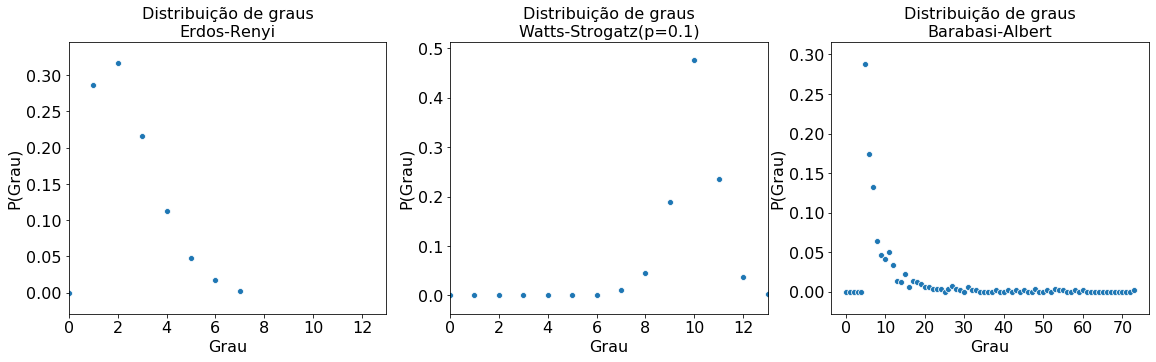

In [33]:
def set_ax_fontsize(ax, fontsize):
    ax.title.set_fontsize(fontsize)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    [tick.set_fontsize(fontsize) for tick in ax.get_xticklabels()];
    [tick.set_fontsize(fontsize) for tick in ax.get_yticklabels()];

fig, axis = plt.subplots(1,3, figsize=(8,5))

k_er, pk_er = degree_distribution(er)
plt.subplots_adjust(right=2)
axis[0].set_xlabel('Grau')
axis[0].set_ylabel('P(Grau)')
axis[0].set_title('Distribuição de graus\nErdos-Renyi')
set_ax_fontsize(axis[0], 16)
sns.scatterplot(x=k_er, y=pk_er, ax=axis[0])
#sns.distplot(k_er,ax=axis[0], hist=False)

k_ws, pk_ws = degree_distribution(ws)
axis[1].set_xlabel('Grau')
axis[1].set_ylabel('P(Grau)')
axis[1].set_title('Distribuição de graus\nWatts-Strogatz(p=0.1)')
set_ax_fontsize(axis[1], 16)
sns.scatterplot(x=k_ws, y=pk_ws, ax=axis[1]);
#sns.distplot(k_ws, ax=axis[1], hist=False);

max_er = max(k_er)
max_ws = max(k_ws)
xlim = max_er if max_er >= max_ws else max_ws

k_ba, pk_ba = degree_distribution(ba)
axis[2].set_xlabel('Grau')
axis[2].set_ylabel('P(Grau)')
axis[2].set_title('Distribuição de graus\nBarabasi-Albert')
set_ax_fontsize(axis[2], 16)
sns.scatterplot(x=k_ba, y=pk_ba, ax=axis[2]);
#print(k_ba)
#sns.distplot(k_ba, ax=axis[2], hist=False);

axis[0].set_xlim(xmin=0, xmax=xlim)
axis[1].set_xlim(xmin=0, xmax=xlim)

Pela distribuiução do grau, temos que ER e WS não são livres de escala, já BA apresenta comportamente livre de escala. Isso é esperado, pois ER gera arestas com mesma probabilidade, independente do vértice, sem gerar hubs, por sua vez a rede WS apresenta uma variação menor do grau de um vértice, uma vez que seu processo de geração começa com uma rede regular, com possibilidade de "rewiring", poucos vértices se tornarão muito conectados, mantendo a distribuição do grtau bem próxima da média. A rede BA, ao contrário das duas anteriores, força a presença de hubs, apresentando uma distribuição livre-de-escala.

Em termos de assortatividade, ER e WS apresentam assortatividade próxima de 0, uma vez que a probabilidade de existir arestas não depende do grau do vértice, i.e., não existem prioridades de conexão, já nas redes BA é esperado que vértices altamente conectados, se conectem com vértices menos conectados, gerando disassortatividade (< 0).

## Exercício 2

In [71]:
ex2 = pd.Series()
for k in np.arange(0, 5, 0.05):
    num_iter = 30
    avg_degs = np.zeros(num_iter)
    for i in range(num_iter):
        n = 500
        p = k/(n-1)
        er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
        giant_comp = sorted(nx.connected_component_subgraphs(er), key = len, reverse=True)[0]
        avg_degs[i] = len(giant_comp)/n
    ex2.loc[k] = avg_degs.mean()

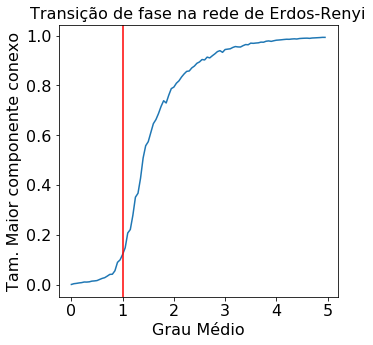

In [72]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
sns.lineplot(x=ex2.index, y=ex2, ax=axis)
axis.set_title('Transição de fase na rede de Erdos-Renyi')
axis.set_xlabel('Grau Médio')
axis.set_ylabel('Tam. Maior componente conexo')
axis.axvline(x=1, color='red')
set_ax_fontsize(axis, 16)

In [73]:
ex2 = pd.DataFrame(columns=['N','k','Avg.Short.Path', 'Real diameter', 'Theoretical Diameter'])
for k in [4, 10, 20, 30]:
    for n in range(100, 300, 10):
        p = k/(n-1)
        er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
        giant_comp = sorted(nx.connected_component_subgraphs(er), key = len, reverse=True)[0]
        short = nx.average_shortest_path_length(giant_comp)
        #dmax = nx.diameter(giant_comp)
        avg_deg = len(giant_comp)/giant_comp.number_of_edges()
        #diam = np.abs(np.log(len(giant_comp))/np.log(avg_deg))
        theoretical = np.log(n)/np.log(k)
        ex2.loc[ex2.shape[0]] = [n, k, short, dmax, theoretical]
ex2

,N,k,Avg.Short.Path,Real diameter,Theoretical Diameter
0,100.0,4.0,3.245465,3.0,3.321928
1,110.0,4.0,3.818864,3.0,3.390680
2,120.0,4.0,3.352785,3.0,3.453445
3,130.0,4.0,3.480684,3.0,3.511184
4,140.0,4.0,3.605338,3.0,3.564642
...,...,...,...,...,...
75,250.0,30.0,1.903229,3.0,1.623387
76,260.0,30.0,1.901040,3.0,1.634919
77,270.0,30.0,1.918601,3.0,1.646015
78,280.0,30.0,1.928597,3.0,1.656708


Text(0.5, 1.0, 'Average shortest path x Diâmetro teórico')

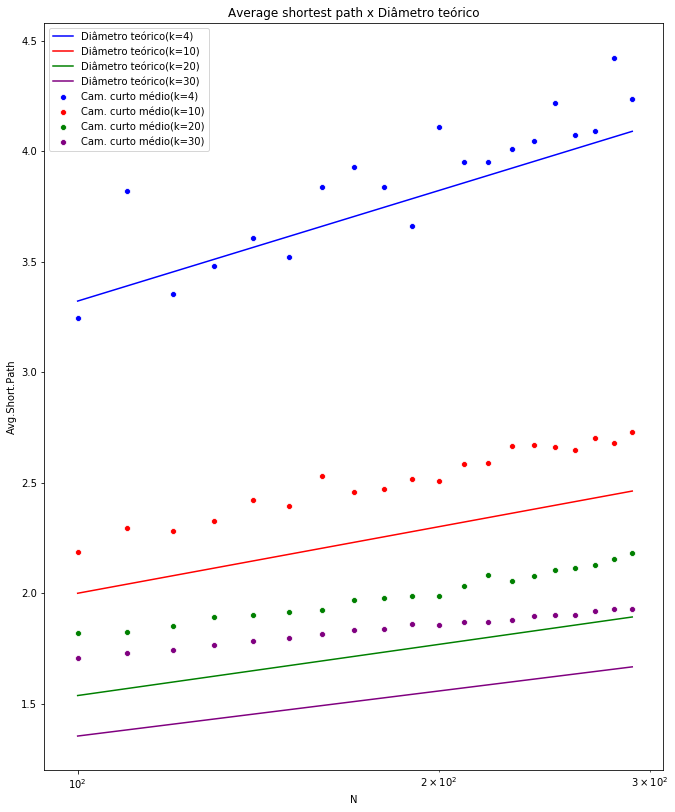

In [74]:
fig, axis = plt.subplots(1,1, figsize=(8,5))
plt.subplots_adjust(top=2.2, right=1.2)

#Calcular reta ao inves de usar a formula calculada com o diametro da rede

k_4 = ex2[ex2['k']==4]
#sns.scatterplot(x=k_4['N'], y=k_4['Real diameter'], ax=axis[0,0], label='Diâmetro real');
sns.lineplot(x=k_4['N'], y=k_4['Theoretical Diameter'], ax=axis, label='Diâmetro teórico(k=4)', color='blue')
g3 = sns.scatterplot(x=k_4['N'], y=k_4['Avg.Short.Path'], ax=axis, label='Cam. curto médio(k=4)', color='blue');
g3.set(xscale='log')

#xis[0,0].set_title('Diâmetro\nk=4')

k_10 = ex2[ex2['k'] == 10]
#sns.scatterplot(x=k_10['N'], y=k_10['Real diameter'], ax=axis[0,1], label='Diâmetro real');
sns.lineplot(x=k_10['N'], y=k_10['Theoretical Diameter'], ax=axis, label='Diâmetro teórico(k=10)', color='red')
g3 = sns.scatterplot(x=k_10['N'], y=k_10['Avg.Short.Path'], ax=axis, label='Cam. curto médio(k=10)', color='red');
g3.set(xscale='log')
#xis[0,0].set_title('Diâmetro\nk=10')

k_20 = ex2[ex2['k'] == 20]
#sns.scatterplot(x=k_20['N'], y=k_20['Real diameter'], ax=axis[1,0], label='Diâmetro real')
sns.lineplot(x=k_20['N'], y=k_20['Theoretical Diameter'], ax=axis, label='Diâmetro teórico(k=20)', color='green')
g3 = sns.scatterplot(x=k_20['N'], y=k_20['Avg.Short.Path'], ax=axis, label='Cam. curto médio(k=20)', color='green')
g3.set(xscale='log')
#xis[0,0].set_title('Diâmetro\nk=20')

k_30 = ex2[ex2['k'] == 30]
#sns.scatterplot(x=k_30['N'], y=k_30['Real diameter'], ax=axis[1,1], label='Diâmetro real')
sns.lineplot(x=k_30['N'], y=k_30['Theoretical Diameter'], ax=axis, label='Diâmetro teórico(k=30)', color='purple')
g3 = sns.scatterplot(x=k_30['N'], y=k_30['Avg.Short.Path'], ax=axis, label='Cam. curto médio(k=30)', color='purple')
g3.set(xscale='log')
#xis[0,0].set_title('Diâmetro\nk=30')

axis.set_title('Average shortest path x Diâmetro teórico')

As redes ER não apresentam características de Small World, o que é evidenciado nas redes de alto diâmetro onde o diâmetro real (azul) da rede se afasta do esperado nas redes small-world, i.e., $d_{max} = \frac{logN}{log<K>}$ (em laranja). Na rede com diâmetro muito baixo k=4, existe uma proximidade, mas é devido ao diâmetro ser pequeno de mais para trazer diferenças entre conexões de longa distancia e conexões próximas, é notável que conforme o diâmetro aumenta o diâmetro real se afasta do esperado em redes small world nas redes ER.

## Exercício 3

In [11]:
ex3_ws = pd.DataFrame(columns=['p','Mean vertex-vertex distance','Clustering','Variance'])
n = 100
k = 5
for index, p in enumerate(np.arange(0, 1, 0.01)):
    size = 30
    clusts = np.zeros(size)
    dists = np.zeros(size)
    varis = np.zeros(size)
    for i in range(size):
        ws = nx.watts_strogatz_graph(n, k, p, seed=None)
        dists[i] = nx.average_shortest_path_length(ws)
        clusts[i] = nx.average_clustering(ws)
        varis[i] = moment_of_degree_distribution(ws, 2)
    
    ex3_ws.loc[index] = [p, dists.mean(), clusts.mean(), varis.mean()]
ex3_ws

,p,Mean vertex-vertex distance,Clustering,Variance
0,0.00,12.878788,0.500000,16.000000
1,0.01,10.858667,0.489600,16.036000
2,0.02,8.880054,0.475733,16.069333
3,0.03,7.204862,0.455892,16.130000
4,0.04,6.738916,0.445694,16.159333
...,...,...,...,...
95,0.95,3.449246,0.031203,17.966000
96,0.96,3.445461,0.032941,18.009333
97,0.97,3.447293,0.032372,17.981333
98,0.98,3.436061,0.028759,18.032667


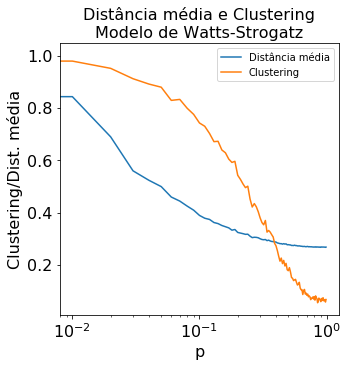

In [35]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
dist = ex3_ws['Mean vertex-vertex distance']
dist = dist/dist.max()
cluster = ex3_ws['Clustering']
cluster = cluster/cluster.max()
sns.lineplot(x=ex3_ws['p'], y=dist, ax=axis, label='Distância média')
graph = sns.lineplot(x=ex3_ws['p'], y=cluster, ax=axis, label='Clustering')
graph.set(xscale='log')
axis.set_title('Distância média e Clustering\nModelo de Watts-Strogatz')
axis.set_ylabel('Clustering/Dist. média')
set_ax_fontsize(axis, 16)

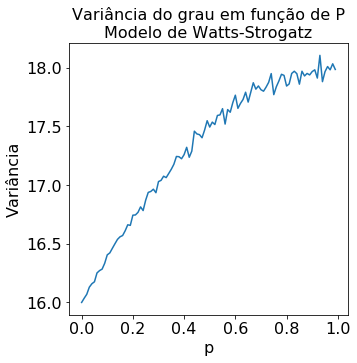

In [36]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
sns.lineplot(x=ex3_ws['p'], y=ex3_ws['Variance'], ax=axis)
axis.set_title('Variância do grau em função de P\nModelo de Watts-Strogatz')
axis.set_ylabel('Variância')
set_ax_fontsize(axis, 16)

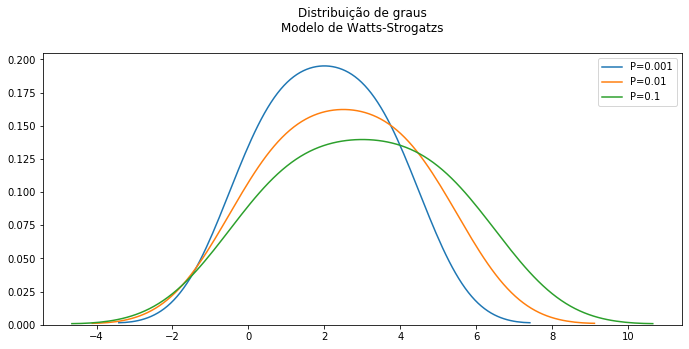

In [37]:
fig, axis = plt.subplots(1,1, figsize=(5,5))
plt.subplots_adjust(right=1.9)

n = 100
k = 5
for index, p in enumerate([0.001, 0.01, 0.1]):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    degrees, _ = degree_distribution(ws)
    axis.set_title('Distribuição de graus\nModelo de Watts-Strogatzs\n')
    sns.distplot(degrees, ax=axis, hist=False, label='P={}'.format(p))

In [126]:
ex3_lat = pd.DataFrame(columns=['Avg.Dist.1D','Avg.Dist.2D','Avg.Dist.3D','Avg.Dist.ER(p=0.001)',
                               'Avg.Dist.ER(p=0.01)','Avg.Dist.ER(p=0.1)','Avg.Dist.ER(p=1)'])
n = 1

for n in range(50,500,50):
    dims = np.array([n])
    grid_1d = nx.watts_strogatz_graph(n, 2, 0, seed=None) 
    
    dims = [int(n**(1/2)), int(n**(1/2))]
    grid_2d = nx.watts_strogatz_graph(n, 4, 0, seed=None)
    
    dims = [int(n**(1/3)), int(n**(1/3)), int(n**(1/3))]
    grid_3d = nx.watts_strogatz_graph(n, 6, 0, seed=None)
    
    er_0001 = nx.gnp_random_graph(n=n, p=0.001, seed=None, directed=False)
    er_001 = nx.gnp_random_graph(n=n, p=0.01, seed=None, directed=False)
    er_01 = nx.gnp_random_graph(n=n, p=0.1, seed=None, directed=False)
    er_1 = nx.gnp_random_graph(n=n, p=1, seed=None, directed=False)

    giant_comp_0001 = sorted(nx.connected_component_subgraphs(er_0001), key = len, reverse=True)[0] 
    giant_comp_001 = sorted(nx.connected_component_subgraphs(er_001), key = len, reverse=True)[0] 
    giant_comp_01 = sorted(nx.connected_component_subgraphs(er_01), key = len, reverse=True)[0] 
    giant_comp_1 = sorted(nx.connected_component_subgraphs(er_1), key = len, reverse=True)[0] 
    
    diam_1d = nx.diameter(grid_1d)
    diam_2d = nx.diameter(grid_2d)
    diam_3d = nx.diameter(grid_3d)
    diam_rand0001 = nx.diameter(giant_comp_0001)
    diam_rand_001 = nx.diameter(giant_comp_001)
    diam_rand01 = nx.diameter(giant_comp_01)
    diam_rand1 = nx.diameter(giant_comp_1)
    #avg_1d = len(grid_1d)/grid_1d.number_of_edges()
    #avg_2d = len(grid_2d)/grid_1d.number_of_edges()
    #avg_3d = len(grid_3d)/grid_1d.number_of_edges()
    ex3_lat.loc[n] = [diam_1d, diam_2d, diam_3d, diam_rand0001, diam_rand_001, diam_rand01, diam_rand1]

ex3_lat = ex3_lat.astype('int32')
ex3_lat

,Avg.Dist.1D,Avg.Dist.2D,Avg.Dist.3D,Avg.Dist.ER(p=0.001),Avg.Dist.ER(p=0.01),Avg.Dist.ER(p=0.1),Avg.Dist.ER(p=1)
50,25,13,9,1,5,5,1
100,50,25,17,1,8,4,1
150,75,38,25,2,15,3,1
200,100,50,34,3,17,3,1
250,125,63,42,2,12,3,1
300,150,75,50,5,13,3,1
350,175,88,59,4,9,3,1
400,200,100,67,4,10,3,1
450,225,113,75,5,8,3,1


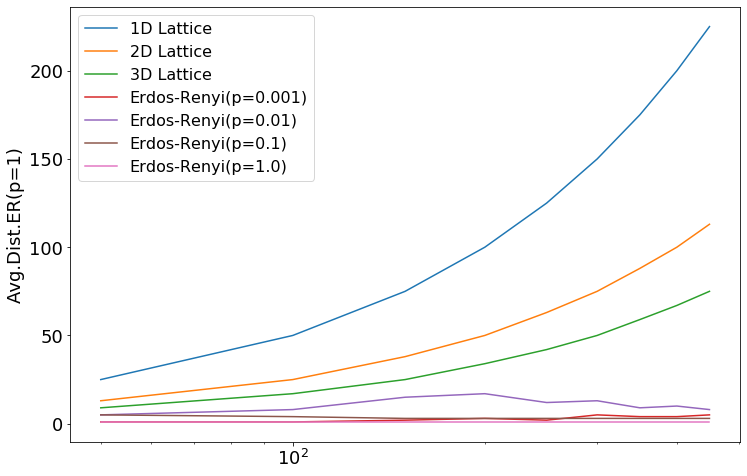

In [128]:
fig, axis = plt.subplots(1,1, figsize=(12,8))


sns.lineplot(x=ex3_lat['Avg.Dist.1D'].index,y=ex3_lat['Avg.Dist.1D'],ax=axis, label='1D Lattice')
sns.lineplot(x=ex3_lat['Avg.Dist.2D'].index,y=ex3_lat['Avg.Dist.2D'],ax=axis, label='2D Lattice')
sns.lineplot(x=ex3_lat['Avg.Dist.3D'].index,y=ex3_lat['Avg.Dist.3D'],ax=axis, label='3D Lattice')
sns.lineplot(x=ex3_lat['Avg.Dist.ER(p=0.001)'].index,y=ex3_lat['Avg.Dist.ER(p=0.001)'],ax=axis, label='Erdos-Renyi(p=0.001)')
sns.lineplot(x=ex3_lat['Avg.Dist.ER(p=0.01)'].index,y=ex3_lat['Avg.Dist.ER(p=0.01)'],ax=axis, label='Erdos-Renyi(p=0.01)')
sns.lineplot(x=ex3_lat['Avg.Dist.ER(p=0.1)'].index,y=ex3_lat['Avg.Dist.ER(p=0.1)'],ax=axis, label='Erdos-Renyi(p=0.1)')
g = sns.lineplot(x=ex3_lat['Avg.Dist.ER(p=1)'].index,y=ex3_lat['Avg.Dist.ER(p=1)'],ax=axis, label='Erdos-Renyi(p=1.0)')
g.set(xscale='log')

axis.legend(fontsize=16)
set_ax_fontsize(axis, 18)

## Exercício 4

In [107]:
ex4 = pd.DataFrame(columns=['N','Avg.Deg','2nd.Moment','Avg.Short.Path Length',
                            'Avg.Clustering','Transitivity','Assortativity','Model'])
k = 5
dist = (np.random.power(a=3, size=100)*k).astype(int)
print(len(dist))
if(sum(dist) % 2 != 0):
    pos = np.random.randint(0, len(dist))
    dist[pos] = dist[pos]+ 1
config = nx.Graph(nx.configuration_model(dist))
giant_comp = sorted(nx.connected_component_subgraphs(config), key = len, reverse=True)[0]
ex4.loc[0] = compute_statistics(giant_comp, 'Configuration')

ba = nx.barabasi_albert_graph(n, int(k/2)) #Perguntar o motivo da divisão por 2
ex4.loc[1] = compute_statistics(ba, 'Barabasi-Albert')
ex4

100


,N,Avg.Deg,2nd.Moment,Avg.Short.Path Length,Avg.Clustering,Transitivity,Assortativity,Model
0,97,0.595092,11.876289,4.035868,0.000000,0,-0.051780,Configuration
1,240,0.504202,33.708333,3.455962,0.056119,0.0302606,-0.135839,Barabasi-Albert


In [133]:
m = 10
max_df = pd.DataFrame(columns=['Max.Deg.0.5','Max.Deg.1','Max.Deg.1.5'])

for i in range(10, 100):
    simul_amount = 100
    
    max_05 = np.zeros(simul_amount)
    max_1 = np.zeros(simul_amount)
    max_15 = np.zeros(simul_amount)
    for j in range(simul_amount):
        ig_ba = ig.Graph()
        ig_ba = ig_ba.Barabasi(n=i, m=int(m/2), power=0.5)
        max_05[j] = max(ig_ba.degree())
        
        ig_ba = ig_ba.Barabasi(n=i, m=int(m/2), power=1)
        max_1[j] = max(ig_ba.degree())
    
        ig_ba = ig_ba.Barabasi(n=i, m=int(m/2), power=1.5)
        max_15[j] = max(ig_ba.degree())
    
    
    max_df.loc[i] = [max_05.mean(), max_1.mean(), max_15.mean()]

max_df = ex4_df2.astype('int32')
max_df.apply(pd.to_numeric)

,Max.Deg.0.5,Max.Deg.1,Max.Deg.1.5
10,8,9,9
11,9,9,10
12,10,10,11
13,11,11,11
14,11,12,12
...,...,...,...
95,34,61,88
96,34,61,88
97,34,62,88
98,35,63,90


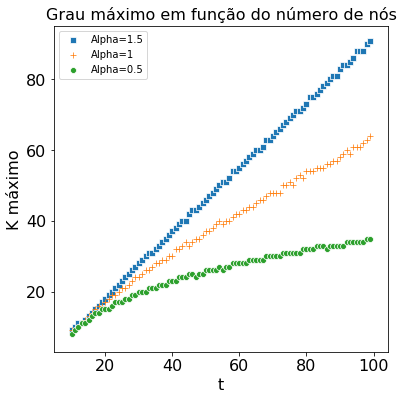

In [138]:
fig, axis = plt.subplots(1,1, figsize=(6,6))

sns.scatterplot(x=max_df.index, y=max_df['Max.Deg.1.5'], label='Alpha=1.5', marker='s');
sns.scatterplot(x=max_df.index, y=max_df['Max.Deg.1'], label='Alpha=1', marker='+')
sns.scatterplot(x=max_df.index, y=max_df['Max.Deg.0.5'], label='Alpha=0.5', marker='o')
axis.set_ylabel('K máximo')
axis.set_xlabel('t')
axis.set_title('Grau máximo em função do número de nós')
set_ax_fontsize(axis, 16)

In [157]:
nl_stats = pd.DataFrame(columns=['N','Avg.Deg','2nd.Moment','Avg.Short.Path Length',
                            'Avg.Clustering','Transitivity','Assortativity','Model'])

n = 300
ba_05 = ig_ba.Barabasi(n=300, m=int(m/2), power=0.5)
ba_05.write_edgelist('ba_05.dat')
ba_05 = nx.read_edgelist('ba_05.dat')
nl_stats.loc[0] = compute_statistics(ba_05, 'Alpha=0.5')

ba_10 = ig_ba.Barabasi(n=300, m=int(m/2), power=1)
ba_10.write_edgelist('ba_10.dat')
ba_10 = nx.read_edgelist('ba_10.dat')
nl_stats.loc[1] = compute_statistics(ba_10, 'Alpha=1.0')

ba_15 = ig_ba.Barabasi(n=300, m=int(m/2), power=1.5)
ba_15.write_edgelist('ba_15.dat')
ba_15 = nx.read_edgelist('ba_15.dat')
nl_stats.loc[2] = compute_statistics(ba_15, 'Alpha=1.5')
nl_stats

,N,Avg.Deg,2nd.Moment,Avg.Short.Path Length,Avg.Clustering,Transitivity,Assortativity,Model
0,300,0.20202,161.053333,2.646065,0.086979,0.083491,-0.007348,Alpha=0.5
1,300,0.20202,394.080000,2.219220,0.364331,0.078036,-0.389797,Alpha=1.0
2,300,0.20202,1194.666667,1.966890,0.944191,0.049208,-0.861963,Alpha=1.5


## Exercício 5

In [375]:
net_df = pd.DataFrame(columns=['n','Avg.Deg.','2nd.Mom.','Avg.Short.Path','Avg.Clustering',
                               'Transitivity','Assortativity','Model'])
#Refazer gerando as redes usando as propriedades N e k da rede do got
k = 10
n = 1000
p = k/(n-1)
for i in range(10):
    er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
    net_df.loc[i] = compute_statistics(er, 'Erdos-Renyi')

n = 1000
p = 0.01
k = 10
for i in range(10, 20):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    net_df.loc[i] = compute_statistics(ws, 'Watts-Strogatz')
    
n = 1000
p = 0.1
k = 10
for i in range(20, 30):
    ba = nx.barabasi_albert_graph(n, int(k/2))
    net_df.loc[i] = compute_statistics(ba, 'Barabasi-Albert')

target = net_df['Model']
net_df = net_df.drop('Model', axis=1)

net_df

,n,Avg.Deg.,2nd.Mom.,Avg.Short.Path,Avg.Clustering,Transitivity,Assortativity
0,1000,0.197668,111.736,3.243774,0.008582,0.009093,0.004202
1,1000,0.199681,110.338,3.251514,0.011043,0.010526,-0.016343
2,1000,0.197707,112.944,3.241041,0.010006,0.010503,0.015244
3,1000,0.199880,110.076,3.259562,0.009529,0.009833,0.041892
4,1000,0.202634,107.222,3.273135,0.009686,0.010169,0.017535
5,1000,0.201654,108.176,3.265768,0.010064,0.009709,0.003226
6,1000,0.200120,109.600,3.255838,0.009311,0.009216,0.004047
7,1000,0.203128,106.594,3.275856,0.007877,0.008248,0.008466
8,1000,0.200562,108.296,3.261475,0.007993,0.008177,-0.001975
9,1000,0.201694,107.812,3.271598,0.010840,0.010848,0.000375


In [387]:
encoder = sklearn.preprocessing.LabelEncoder()
enc_target = encoder.fit_transform(target)

scaler = sklearn.preprocessing.Normalizer()
sc_df = pd.DataFrame(scaler.fit_transform(net_df))

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(sc_df, enc_target)
knn.score(sc_df, enc_target)

1.0

In [392]:
asoiaf = nx.Graph()
asoiaf_df = pd.read_csv('../datasets/asoiaf/data/asoiaf-all-edges.csv')
asoiaf.add_edges_from([tuple(x) for x in asoiaf_df[['Source','Target']].values])
asoiaf = asoiaf.to_undirected()

asoiaf_stats = pd.Series()
asoiaf_stats = compute_statistics(asoiaf,'got')
asoiaf_stats = [asoiaf_stats[:-1]]
sc_asoiaf = scaler.transform(asoiaf_stats)
target_asoiaf = knn.predict(sc_asoiaf)
print('Classe da rede dos personagens de game of thrones:', encoder.inverse_transform(target_asoiaf))

Classe da rede dos personagens de game of thrones: ['Barabasi-Albert']


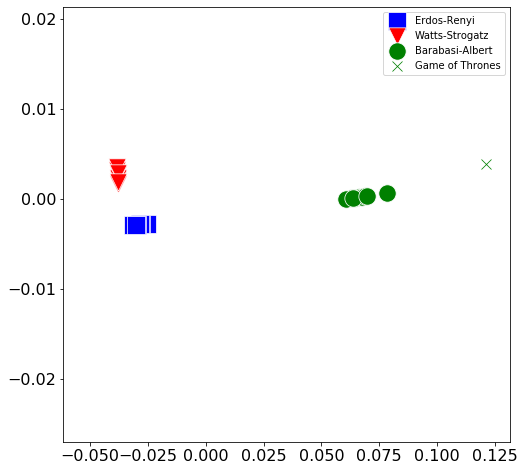

In [393]:
pca = sklearn.decomposition.PCA(n_components=2)
transf_df = pca.fit_transform(sc_df)
transf_asoiaf = pca.transform(sc_asoiaf)

fig, axis = plt.subplots(1,1, figsize=(8,8))

sns.scatterplot(x=transf_df[target == 'Erdos-Renyi'][:,0], y=transf_df[target=='Erdos-Renyi'][:,1], 
                ax=axis, label='Erdos-Renyi', marker='s', color='blue', s=300)
sns.scatterplot(x=transf_df[target == 'Watts-Strogatz'][:,0], y=transf_df[target=='Watts-Strogatz'][:,1], 
                ax=axis, label='Watts-Strogatz', marker='v', color='red', s=300)
sns.scatterplot(x=transf_df[target == 'Barabasi-Albert'][:,0], y=transf_df[target=='Barabasi-Albert'][:,1], 
                ax=axis, label='Barabasi-Albert', marker='o', color='green', s=300)
sns.scatterplot(x=transf_asoiaf[:,0], y=transf_asoiaf[:,1], ax=axis, label='Game of Thrones', marker='x',
               color='green', s=100)

set_ax_fontsize(axis, 16)